In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:


df_br = pd.read_csv('./data/br.csv').drop(['Unnamed: 0','score','class'],axis=1)
df_score = pd.read_csv('./data/score.csv')
df_sill = pd.read_csv('./data/sill.csv')
df_moti = pd.read_csv('./data/srl_motivation.csv')
df_stra = pd.read_csv('./data/srl_strategy.csv')
df_vscode = pd.read_csv('./data/viscode.csv').drop(['Unnamed: 0','score','class'],axis=1)

In [3]:
df = df_score.merge(df_br,how = 'outer',on = 'userid')
df = df.merge(df_vscode,how = 'outer',on = 'userid')
df = df.merge(df_sill,how = 'outer',on = 'userid')
df = df.merge(df_moti,how = 'outer',on = 'userid')
df = df.merge(df_stra,how = 'outer',on = 'userid')

df

,userid,score,class,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,...,srl_s_41,srl_s_42,srl_s_43,srl_s_44,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50
0,faceedc2fdf78a0f24b2e469c8072881,68.0,a,3.0,41.0,25.0,3.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3017f8db51adce97836bfbd2a5e76bc4,29.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fcd714c799381d83a55d85fc8813aaf2,44.0,a,2.0,10.0,10.0,21.0,0.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,822f678c2e95794c527b1f854bd35006,74.0,a,22.0,72.0,40.0,0.0,0.0,5.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52a83b516a01c8cefdb16bd3acb4b844,76.0,a,6.0,454.0,98.0,186.0,0.0,2.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,25f9e794323b453885f5181f1b624d0b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
477,934121a38d196ca27d3d21c0ce383122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0
478,01291c313aef72b9786046bd7ce4cfca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,4.0,4.0,5.0,5.0,2.0,4.0,5.0,5.0
479,9a7d4b73c5a043b771670c91eb095947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,5.0,4.0


In [4]:
df = df.dropna(axis = 0,subset = 'score')

#Please note that we drop the students whose score is null since they did not complete the course(e.g. They drop this clss).

In [5]:
#We transform the Viscode-spent_time column to seconds instead of string
from datetime import datetime
base = datetime.strptime('00:00:00.0','%X.%f')
total_time = []
for i in df['Viscode-spent_time']:
    if pd.isna(i) or i == '0':
        total_time.append(0)
    else:
        total_time.append((datetime.strptime(str(i),'0 days %X.%f')-base).total_seconds())
df['TotalTime'] = total_time

/var/folders/m_/nbh783bj6mbg_mt64gcnlp340000gn/T/ipykernel_44365/855988627.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalTime'] = total_time


In [6]:
df

,userid,score,class,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,...,srl_s_42,srl_s_43,srl_s_44,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50,TotalTime
0,faceedc2fdf78a0f24b2e469c8072881,68.0,a,3.0,41.0,25.0,3.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1585.812151
1,3017f8db51adce97836bfbd2a5e76bc4,29.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336.167362
2,fcd714c799381d83a55d85fc8813aaf2,44.0,a,2.0,10.0,10.0,21.0,0.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3606.635083
3,822f678c2e95794c527b1f854bd35006,74.0,a,22.0,72.0,40.0,0.0,0.0,5.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4381.924739
4,52a83b516a01c8cefdb16bd3acb4b844,76.0,a,6.0,454.0,98.0,186.0,0.0,2.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2993.799586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,48efb9df6a690a465b3f278c5a9d895a,64.0,i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
465,2f0bdb0015ddeb04983c73c1eac8113e,91.0,i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5950.446043
466,5c7fc46ea1bae8f3d458fcc79e7e46ef,97.0,i,5.0,190.0,12.0,0.0,0.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25997.434617
467,2ae49c0d134fd71043f019270ca2d194,75.0,i,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


<Axes: xlabel='class', ylabel='score'>

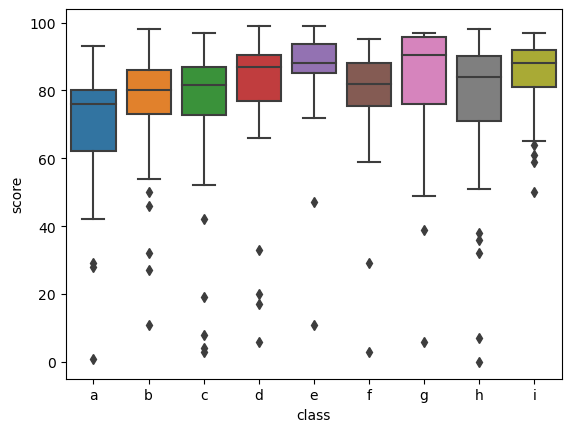

In [7]:
sns.boxplot(data = df , y = 'score',x = 'class')

In [8]:
#Please note that we define the risky students as students whose scores are lower than Q1 in their class. 

classes = df['class'].unique()
q1s = []
for cla in classes:
    class_filter = df['class'] == cla
    q1 = np.quantile(df[class_filter].score,0.25)
    q1s.append(q1)

In [9]:
cla_q1 = dict()
for i in range(len(classes)):
    cla_q1[classes[i]] = q1s[i]
cla_q1

{'a': 62.0,
 'b': 73.0,
 'c': 72.75,
 'd': 77.0,
 'e': 85.0,
 'f': 75.5,
 'g': 76.0,
 'h': 71.0,
 'i': 81.0}

In [10]:
risky = []
for i in df[['score','class']].itertuples():
    if (i[1]<cla_q1[i[2]]):
        risky.append(True)
    else:
        risky.append(False)
df['Risky'] = risky
df['Risky'] = df['Risky'].map({True:0,False:1})

/var/folders/m_/nbh783bj6mbg_mt64gcnlp340000gn/T/ipykernel_44365/702958910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risky'] = risky
/var/folders/m_/nbh783bj6mbg_mt64gcnlp340000gn/T/ipykernel_44365/702958910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risky'] = df['Risky'].map({True:0,False:1})


In [11]:
df

,userid,score,class,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,...,srl_s_43,srl_s_44,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50,TotalTime,Risky
0,faceedc2fdf78a0f24b2e469c8072881,68.0,a,3.0,41.0,25.0,3.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1585.812151,1
1,3017f8db51adce97836bfbd2a5e76bc4,29.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336.167362,0
2,fcd714c799381d83a55d85fc8813aaf2,44.0,a,2.0,10.0,10.0,21.0,0.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3606.635083,0
3,822f678c2e95794c527b1f854bd35006,74.0,a,22.0,72.0,40.0,0.0,0.0,5.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4381.924739,1
4,52a83b516a01c8cefdb16bd3acb4b844,76.0,a,6.0,454.0,98.0,186.0,0.0,2.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2993.799586,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,48efb9df6a690a465b3f278c5a9d895a,64.0,i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
465,2f0bdb0015ddeb04983c73c1eac8113e,91.0,i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5950.446043,1
466,5c7fc46ea1bae8f3d458fcc79e7e46ef,97.0,i,5.0,190.0,12.0,0.0,0.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25997.434617,1
467,2ae49c0d134fd71043f019270ca2d194,75.0,i,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0


### Finding Variables which are statisitically correlated with 'score'.

In [12]:
from scipy import stats

from statsmodels.stats.multitest import fdrcorrection,multipletests


def find_correlated_spearman(alpha,df,drop_columns):
    correlations = []
    correlated= []
    uncorrelated= []
    pvalues = []

    for col in df.drop(drop_columns,axis =1):
        correlation = stats.spearmanr(df.score,np.array(df[col], dtype=float),nan_policy = 'omit')[0]
        pvalue = stats.spearmanr(df.score,np.array(df[col], dtype=float),nan_policy = 'omit')[1]
        correlations.append(correlation)
        if pvalue<=alpha:
            correlated.append(col)
            pvalues.append(pvalue)
        else:
            uncorrelated.append(col)
            pvalues.append(pvalue)

    return [correlated,uncorrelated,pvalues,correlations]
    
def correction1(pvalues,alpha):
    result = statsmodels.stats.multitest.multipletests(pvalues,alpha,'Bonferroni')
    return [result[0],result[1]]

def correction2(pvalues,alpha):
    result = statsmodels.stats.multitest.fdrcorrection(pvalues,alpha)
    return [result[0],result[1]]

def find_corrected_correlation(alpha,df,drop_columns,kind):
    corr = find_correlated_spearman(alpha,df,drop_columns)
    rejected = []
    if kind == 1:
        corrected = correction1(corr[3],alpha)
        rejected = corrected[0]
        return [corr[0],df[rejected],df.drop([rejected]),corrected[1]]
    
    else:
        corrected = correction2(corr[3],alpha)
        rejected = corrected[0]
        return [corr[0],df[rejected],df.drop([rejected]),corrected[1]]

In [13]:
result = find_correlated_spearman(0.05,df,['userid','score','class','ADD_RECOMMENDATION','Viscode-spent_time'])
correlated_variables = result[0]
uncorrelated_variables = result[1]
pvalues = result[2]
correlations = result[3]

In [14]:
result_fdr = fdrcorrection(pvalues,0.05)
result_Bon = multipletests(pvalues,0.05,'Bonferroni')

In [15]:
print("The variables which remain significant after FDR correction:")
index_fdr = df.columns.drop(['userid','score','class','ADD_RECOMMENDATION','Viscode-spent_time'])[result_fdr[0]]
index_fdr

The variables which remain significant after FDR correction:


Index(['CLOSE', 'OPEN', 'PAGE_JUMP', 'PREV', 'code_copy', 'code_execution',
       'code_paste', 'code_speed', 'notebook_open', 'tree_open',
       'AttributeError', 'ConversionError', 'FileNotFoundError', 'IndexError',
       'KeyError', 'KeyboardInterrupt', 'NameError', 'ParserError',
       'TypeError', 'UnboundLocalError', 'ValueError', 'codeLength',
       'Viscode-login_times', 'Viscode-execute_times',
       'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run',
       'Viscode-error_types', 's_10', 's_33', 's_39', 's_40', 's_42', 's_43',
       's_44', 'srl_m_1', 'srl_m_2', 'srl_m_3', 'srl_m_5', 'srl_m_7',
       'srl_m_9', 'srl_m_10', 'srl_m_11', 'srl_m_12', 'srl_m_13', 'srl_m_14',
       'srl_m_15', 'srl_m_16', 'srl_m_17', 'srl_m_18', 'srl_m_19', 'srl_m_20',
       'srl_m_21', 'srl_m_22', 'srl_m_23', 'srl_m_24', 'srl_m_25', 'srl_m_26',
       'srl_m_27', 'srl_m_28', 'srl_m_30', 'srl_s_1', 'srl_s_7', 'srl_s_9',
       'srl_s_10', 'srl_s_16', 'srl_s_18', 'srl_s

In [16]:
len(index_fdr)

80

In [17]:
time_index = pd.Index(['TotalTime'])
activities_fdr = df.columns.drop(['userid','score','class','ADD_RECOMMENDATION','Viscode-spent_time'])[result_fdr[0]][0:28].append(time_index)
activities_fdr

Index(['CLOSE', 'OPEN', 'PAGE_JUMP', 'PREV', 'code_copy', 'code_execution',
       'code_paste', 'code_speed', 'notebook_open', 'tree_open',
       'AttributeError', 'ConversionError', 'FileNotFoundError', 'IndexError',
       'KeyError', 'KeyboardInterrupt', 'NameError', 'ParserError',
       'TypeError', 'UnboundLocalError', 'ValueError', 'codeLength',
       'Viscode-login_times', 'Viscode-execute_times',
       'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run',
       'Viscode-error_types', 'TotalTime'],
      dtype='object')

In [18]:
print("The variables which remain significant after Bonferroni correction:")
index_bon = df.columns.drop(['userid','score','class','ADD_RECOMMENDATION','Viscode-spent_time'])[result_Bon[0]]
index_bon

The variables which remain significant after Bonferroni correction:


Index(['code_copy', 'code_execution', 'code_paste', 'code_speed',
       'notebook_open', 'tree_open', 'AttributeError', 'IndexError',
       'KeyError', 'KeyboardInterrupt', 'TypeError', 'UnboundLocalError',
       'ValueError', 'codeLength', 'Viscode-login_times',
       'Viscode-execute_times', 'Viscode-open_file_times',
       'Viscode-success_run', 'Viscode-error_types', 'srl_m_7', 'srl_m_9',
       'srl_m_11', 'srl_m_19', 'srl_m_20', 'srl_m_21', 'srl_m_22', 'srl_m_23',
       'srl_m_24', 'srl_m_25', 'srl_m_26', 'srl_m_27', 'srl_s_7', 'TotalTime',
       'Risky'],
      dtype='object')

In [19]:
len(index_bon)

34

In [20]:
activities_Bon = df.columns.drop(['userid','score','class','ADD_RECOMMENDATION','Viscode-spent_time'])[result_Bon[0]][0:19].append(time_index)
activities_Bon

Index(['code_copy', 'code_execution', 'code_paste', 'code_speed',
       'notebook_open', 'tree_open', 'AttributeError', 'IndexError',
       'KeyError', 'KeyboardInterrupt', 'TypeError', 'UnboundLocalError',
       'ValueError', 'codeLength', 'Viscode-login_times',
       'Viscode-execute_times', 'Viscode-open_file_times',
       'Viscode-success_run', 'Viscode-error_types', 'TotalTime'],
      dtype='object')

### Establish Activeness Score

In [21]:
def standardize(cols):
    act = []
    for i in cols:
        standardized = (df[i]-df[i].mean())/df[i].std()
        act.append(standardized)
    return sum(act)
        

In [22]:
df['Activeness_Score_Bonferroni'] = standardize(activities_Bon)
df['Activeness_Score_fdr'] = standardize(activities_fdr)

/var/folders/m_/nbh783bj6mbg_mt64gcnlp340000gn/T/ipykernel_44365/2263866423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activeness_Score_Bonferroni'] = standardize(activities_Bon)
/var/folders/m_/nbh783bj6mbg_mt64gcnlp340000gn/T/ipykernel_44365/2263866423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Activeness_Score_fdr'] = standardize(activities_fdr)


In [23]:
df

,userid,score,class,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,ADD_RECOMMENDATION,BOOKMARK_JUMP,CHANGE MEMO,...,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50,TotalTime,Risky,Activeness_Score_Bonferroni,Activeness_Score_fdr
0,faceedc2fdf78a0f24b2e469c8072881,68.0,a,3.0,41.0,25.0,3.0,0.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1585.812151,1,-12.568668,-16.507478
1,3017f8db51adce97836bfbd2a5e76bc4,29.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,336.167362,0,-18.824384,-25.376186
2,fcd714c799381d83a55d85fc8813aaf2,44.0,a,2.0,10.0,10.0,21.0,0.0,0.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3606.635083,0,-0.795161,-4.646035
3,822f678c2e95794c527b1f854bd35006,74.0,a,22.0,72.0,40.0,0.0,0.0,5.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4381.924739,1,-0.430435,-1.091382
4,52a83b516a01c8cefdb16bd3acb4b844,76.0,a,6.0,454.0,98.0,186.0,0.0,2.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2993.799586,1,1.544936,9.420559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,48efb9df6a690a465b3f278c5a9d895a,64.0,i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,NaN,NaN
465,2f0bdb0015ddeb04983c73c1eac8113e,91.0,i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5950.446043,1,0.072792,NaN
466,5c7fc46ea1bae8f3d458fcc79e7e46ef,97.0,i,5.0,190.0,12.0,0.0,0.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25997.434617,1,59.643545,76.290375
467,2ae49c0d134fd71043f019270ca2d194,75.0,i,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,NaN,NaN


<Axes: xlabel='Activeness_Score_Bonferroni', ylabel='score'>

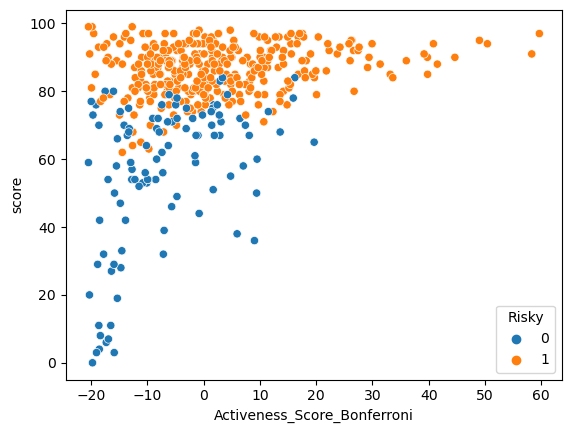

In [24]:
sns.scatterplot(data = df, x = 'Activeness_Score_Bonferroni',y = 'score',hue = 'Risky')

### Machine Learing Results: Selected Variables and Non-selected Variables

In [25]:
from sklearn.impute import KNNImputer

df_ml = df.drop(['userid','score','class','ADD_RECOMMENDATION','Viscode-spent_time'],axis=1)

imputer = KNNImputer(n_neighbors=5)
df_ml = pd.DataFrame(imputer.fit_transform(df_ml), columns = df_ml.columns)

In [26]:
df_ml

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,srl_s_45,srl_s_46,srl_s_47,srl_s_48,srl_s_49,srl_s_50,TotalTime,Risky,Activeness_Score_Bonferroni,Activeness_Score_fdr
0,3.0,41.0,25.0,3.0,2.0,5.0,0.0,81.0,0.0,2.0,...,3.8,3.8,3.8,3.4,3.0,3.0,1585.812151,1.0,-12.568668,-16.507478
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,...,3.8,3.8,3.8,3.4,3.8,3.2,336.167362,0.0,-18.824384,-25.376186
2,2.0,10.0,10.0,21.0,0.0,14.0,2.0,67.0,0.0,2.0,...,3.8,4.0,4.4,3.8,4.2,2.8,3606.635083,0.0,-0.795161,-4.646035
3,22.0,72.0,40.0,0.0,5.0,27.0,0.0,153.0,0.0,3.0,...,3.8,3.6,4.0,3.0,3.6,3.4,4381.924739,1.0,-0.430435,-1.091382
4,6.0,454.0,98.0,186.0,2.0,100.0,0.0,373.0,0.0,2.0,...,3.4,3.4,4.2,3.6,4.4,3.8,2993.799586,1.0,1.544936,9.420559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,3.8,3.8,3.8,3.4,3.8,3.2,0.000000,0.0,-19.381311,-26.052087
465,8.8,185.0,19.2,5.8,0.2,38.2,0.2,133.2,0.2,1.4,...,3.4,3.6,3.8,3.4,3.6,2.8,5950.446043,1.0,0.072792,2.642727
466,5.0,190.0,12.0,0.0,0.0,5.0,0.0,28.0,0.0,0.0,...,3.4,3.4,4.4,4.4,4.4,4.2,25997.434617,1.0,59.643545,76.290375
467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,1.0,...,3.8,3.8,3.8,3.4,3.8,3.2,0.000000,0.0,-19.306260,-25.578276


In [27]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(['Risky'],axis=1)
X_bon = df_ml[index_bon]
X_fdr = df_ml[index_fdr]


y = df['Risky']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

X_train_bon, X_test_bon, y_train_bon, y_test_bon = train_test_split(X_bon, y, test_size=0.33, random_state=50)

X_train_fdr, X_test_fdr, y_train_fdr, y_test_fdr = train_test_split(X_fdr, y, test_size=0.33, random_state=50)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [29]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [30]:

clf1 = RandomForestClassifier().fit(X_train, y_train)
score =  clf1.score(X_test,y_test)
pre_score = precision_score(y_test,clf1.predict(X_test))
re_score = recall_score(y_test,clf1.predict(X_test))
f1score = f1_score(y_test,clf1.predict(X_test))
print('The accuracy of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = score*100))
print('The precision of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score*100))
print('The recall of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = re_score*100))
print('The f1-score of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = f1score*100))
print()

clf2 = RandomForestClassifier().fit(X_train_bon, y_train_bon)
score_bon = clf2.score(X_test_bon,y_test_bon)
pre_score_bon = precision_score(y_test,clf2.predict(X_test_bon))
re_score_bon = recall_score(y_test,clf2.predict(X_test_bon))
f1score_bon = f1_score(y_test,clf2.predict(X_test_bon))
print('The accuracy of Random Forest Classifier using correlated variables (Bonferonni correction) is:','{acc}%'.format(acc = score_bon*100))
print('The precision of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score_bon*100))
print('The recall of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = re_score_bon*100))
print('The f1-score of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = f1score_bon*100))
print()

clf3 = RandomForestClassifier().fit(X_train_fdr, y_train_fdr)
score_fdr = clf3.score(X_test_fdr,y_test_fdr)
pre_score_fdr = precision_score(y_test,clf3.predict(X_test_fdr))
re_score_fdr = recall_score(y_test,clf3.predict(X_test_fdr))
f1score_fdr = f1_score(y_test,clf3.predict(X_test_fdr))
print('The accuracy of Random Forest Classifier using correlated variables (fdr correction) is:','{acc}%'.format(acc = score_fdr*100))
print('The precision of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score_fdr*100))
print('The recall of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = re_score_fdr*100))
print('The f1-score of Random Forest Classifier using non-selected variables is:','{acc}%'.format(acc = f1score_fdr*100))
print()
print('The accuracy improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (score_bon-score)/score*100))
print('The accuracy improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (score_fdr-score)/score*100))

print()
print('The precision improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (pre_score_bon-pre_score)/pre_score*100))
print('The precision improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (pre_score_fdr-pre_score)/pre_score*100))

print()
print('The recall improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (re_score_bon-re_score)/re_score*100))
print('The recall improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (re_score_fdr-re_score)/re_score*100))


print()
print('The f1-score improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (f1score_bon-f1score)/f1score*100))
print('The f1-score improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (f1score_fdr-f1score)/f1score*100))


The accuracy of Random Forest Classifier using non-selected variables is: 76.77419354838709%
The precision of Random Forest Classifier using non-selected variables is: 77.30496453900709%
The recall of Random Forest Classifier using non-selected variables is: 96.46017699115043%
The f1-score of Random Forest Classifier using non-selected variables is: 85.8267716535433%

The accuracy of Random Forest Classifier using correlated variables (Bonferonni correction) is: 100.0%
The precision of Random Forest Classifier using non-selected variables is: 100.0%
The recall of Random Forest Classifier using non-selected variables is: 100.0%
The f1-score of Random Forest Classifier using non-selected variables is: 100.0%

The accuracy of Random Forest Classifier using correlated variables (fdr correction) is: 99.35483870967742%
The precision of Random Forest Classifier using non-selected variables is: 99.12280701754386%
The recall of Random Forest Classifier using non-selected variables is: 100.0%
Th

In [31]:

clf1 = LogisticRegression(solver = 'liblinear',max_iter = 10000,penalty = 'l2').fit(X_train, y_train)
score =  clf1.score(X_test,y_test)
pre_score = precision_score(y_test,clf1.predict(X_test))
re_score = recall_score(y_test,clf1.predict(X_test))
f1score = f1_score(y_test,clf1.predict(X_test))
print('The accuracy of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = score*100))
print('The precision of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score*100))
print('The recall of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = re_score*100))
print('The f1-score of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = f1score*100))
print()

clf2 = LogisticRegression(solver = 'liblinear',max_iter = 10000,penalty = 'l2').fit(X_train_bon, y_train_bon)
score_bon = clf2.score(X_test_bon,y_test_bon)
pre_score_bon = precision_score(y_test,clf2.predict(X_test_bon))
re_score_bon = recall_score(y_test,clf2.predict(X_test_bon))
f1score_bon = f1_score(y_test,clf2.predict(X_test_bon))
print('The accuracy of Logistic Regression Classifier using correlated variables (Bonferonni correction) is:','{acc}%'.format(acc = score_bon*100))
print('The precision of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score_bon*100))
print('The recall of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = re_score_bon*100))
print('The f1-score of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = f1score_bon*100))
print()

clf3 = LogisticRegression(solver = 'liblinear',max_iter = 10000,penalty = 'l2').fit(X_train_fdr, y_train_fdr)
score_fdr = clf3.score(X_test_fdr,y_test_fdr)
pre_score_fdr = precision_score(y_test,clf3.predict(X_test_fdr))
re_score_fdr = recall_score(y_test,clf3.predict(X_test_fdr))
f1score_fdr = f1_score(y_test,clf3.predict(X_test_fdr))
print('The accuracy of Logistic Regression Classifier using correlated variables (fdr correction) is:','{acc}%'.format(acc = score_fdr*100))
print('The precision of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score_fdr*100))
print('The recall of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = re_score_fdr*100))
print('The f1-score of Logistic Regression Classifier using non-selected variables is:','{acc}%'.format(acc = f1score_fdr*100))
print()
print('The accuracy improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (score_bon-score)/score*100))
print('The accuracy improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (score_fdr-score)/score*100))

print()
print('The precision improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (pre_score_bon-pre_score)/pre_score*100))
print('The precision improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (pre_score_fdr-pre_score)/pre_score*100))

print()
print('The recall improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (re_score_bon-re_score)/re_score*100))
print('The recall improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (re_score_fdr-re_score)/re_score*100))


print()
print('The f1-score improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (f1score_bon-f1score)/f1score*100))
print('The f1-score improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (f1score_fdr-f1score)/f1score*100))


The accuracy of Random Forest Classifier using non-selected variables is: 72.25806451612902%
The precision of Random Forest Classifier using non-selected variables is: 80.17241379310344%
The recall of Random Forest Classifier using non-selected variables is: 82.30088495575221%
The f1-score of Random Forest Classifier using non-selected variables is: 81.22270742358077%

The accuracy of Random Forest Classifier using correlated variables (Bonferonni correction) is: 100.0%
The precision of Random Forest Classifier using non-selected variables is: 100.0%
The recall of Random Forest Classifier using non-selected variables is: 100.0%
The f1-score of Random Forest Classifier using non-selected variables is: 100.0%

The accuracy of Random Forest Classifier using correlated variables (fdr correction) is: 96.7741935483871%
The precision of Random Forest Classifier using non-selected variables is: 95.76271186440678%
The recall of Random Forest Classifier using non-selected variables is: 100.0%
Th

In [32]:

clf1 = BernoulliNB().fit(X_train, y_train)
score =  clf1.score(X_test,y_test)
pre_score = precision_score(y_test,clf1.predict(X_test))
re_score = recall_score(y_test,clf1.predict(X_test))
f1score = f1_score(y_test,clf1.predict(X_test))
print('The accuracy of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = score*100))
print('The precision of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score*100))
print('The recall of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = re_score*100))
print('The f1-score of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = f1score*100))
print()

clf2 = BernoulliNB().fit(X_train_bon, y_train_bon)
score_bon = clf2.score(X_test_bon,y_test_bon)
pre_score_bon = precision_score(y_test,clf2.predict(X_test_bon))
re_score_bon = recall_score(y_test,clf2.predict(X_test_bon))
f1score_bon = f1_score(y_test,clf2.predict(X_test_bon))
print('The accuracy of Naive Bayes Classifier using correlated variables (Bonferonni correction) is:','{acc}%'.format(acc = score_bon*100))
print('The precision of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score_bon*100))
print('The recall of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = re_score_bon*100))
print('The f1-score of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = f1score_bon*100))
print()

clf3 = BernoulliNB().fit(X_train_fdr, y_train_fdr)
score_fdr = clf3.score(X_test_fdr,y_test_fdr)
pre_score_fdr = precision_score(y_test,clf3.predict(X_test_fdr))
re_score_fdr = recall_score(y_test,clf3.predict(X_test_fdr))
f1score_fdr = f1_score(y_test,clf3.predict(X_test_fdr))
print('The accuracy of Naive Bayes Classifier using correlated variables (fdr correction) is:','{acc}%'.format(acc = score_fdr*100))
print('The precision of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = pre_score_fdr*100))
print('The recall of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = re_score_fdr*100))
print('The f1-score of Naive Bayes Classifier using non-selected variables is:','{acc}%'.format(acc = f1score_fdr*100))
print()
print('The accuracy improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (score_bon-score)/score*100))
print('The accuracy improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (score_fdr-score)/score*100))

print()
print('The precision improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (pre_score_bon-pre_score)/pre_score*100))
print('The precision improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (pre_score_fdr-pre_score)/pre_score*100))

print()
print('The recall improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (re_score_bon-re_score)/re_score*100))
print('The recall improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (re_score_fdr-re_score)/re_score*100))


print()
print('The f1-score improvement rate using correlated variables (Bonferonni correction) is {rate}%'.format(rate = (f1score_bon-f1score)/f1score*100))
print('The f1-score improvement rate using correlated variables (fdr correction) is {rate}%'.format(rate = (f1score_fdr-f1score)/f1score*100))


The accuracy of Random Forest Classifier using non-selected variables is: 78.70967741935485%
The precision of Random Forest Classifier using non-selected variables is: 79.41176470588235%
The recall of Random Forest Classifier using non-selected variables is: 95.57522123893806%
The f1-score of Random Forest Classifier using non-selected variables is: 86.74698795180723%

The accuracy of Random Forest Classifier using correlated variables (Bonferonni correction) is: 99.35483870967742%
The precision of Random Forest Classifier using non-selected variables is: 100.0%
The recall of Random Forest Classifier using non-selected variables is: 99.11504424778761%
The f1-score of Random Forest Classifier using non-selected variables is: 99.55555555555556%

The accuracy of Random Forest Classifier using correlated variables (fdr correction) is: 99.35483870967742%
The precision of Random Forest Classifier using non-selected variables is: 100.0%
The recall of Random Forest Classifier using non-selecte

In [33]:
len(df.columns.drop(['userid','score','class','ADD_RECOMMENDATION','Viscode-spent_time']))

208